In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
housing_combined_data_df = pd.read_csv(r"https://raw.githubusercontent.com/chaenii989/Final_Project_What_is_Affecting_US_Housing_Market/main/etl/housing_combined_data.csv")

In [3]:
# Multivariate Linear Regression for Time-Series Data with Machine Learning

def MultivariateLinearRegression(df, target_column):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    df["y_actual_output"] = target_column
    df = df.set_index("date")

    data = {}

    last_col = len(df.iloc[0,:])
    print(f"Number of Columns: {last_col}")

    for i in range(0, (last_col - 1)):
        list = df.iloc[:, i].astype("float").to_list()
        x_list = [0]
        for x in list:
            x_list.append(x)
        data[f'X{i+1}'] = f'X{i+1}'
        data[f'X{i+1}'] = x_list

    y_list = df.iloc[:, last_col - 1].astype("float").to_list()
    y_list.append(0)
    data['Y'] = y_list

    ml_df = pd.DataFrame(data)

    last_row = len(ml_df.iloc[:,1])
    last = len(ml_df.iloc[0,:])
    ml_df = ml_df.drop(0, inplace=False).drop(last_row - 1, inplace=False)
    print("Machine Learning Data Set")
    print(ml_df.head(5))
    print(ml_df.tail(5))

    # Assign the data to X and y
    X = ml_df.iloc[:,0:last-1]
    y = ml_df["Y"].values.reshape(-1, 1)
    print("Shape: ", X.shape, y.shape)

    # Use train_test_split to create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Create the model using LinearRegression
    model = LinearRegression()

    # Fitting our model with all of our features in X
    model.fit(X, y)
    score = model.score(X, y)
    print(f"R2 Score: {score}")

    # Fit the model to the training data and calculate the scores for the training and testing data
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    print(f"Training Score: {training_score}")
    print(f"Testing Score: {testing_score}")

    # Print the coefficient and the intercept for the model
    print('Weight coefficients: ', model.coef_)
    print('Y-Axis Intercept: ', model.intercept_)

    # X value min & max
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    # print("---------------------")
    print(f"Actual Output: {y[0]}")
    print(f"Predicted Output: {predictions[0]}")
    print(f"Prediction Error: {predictions[0]-y[0]}")
    # print("---------------------")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")
    # print("---------------------")

    # Plot the Residuals for the Training and Testing data
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y.min(), xmax=y.max())
    plt.title("Residual Plot")

    #Build predicted values dataframe
    df = df.reset_index()
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    return predicted_df

In [4]:
housing_combined_data_df = housing_combined_data_df.dropna()
housing_combined_data_df.head(5)

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,1990-01-01,10.13,1425.666667,123900.0,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667
1,1990-04-01,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333
2,1990-07-01,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667
3,1990-10-01,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333
4,1991-01-01,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333


Number of Columns: 11
Machine Learning Data Set
      X1           X2        X3    X4     X5        X6           X7      X8  \
1  10.13  1425.666667  123900.0  64.1  55.58  7.466667  1441.000000  116.47   
2  10.32  1212.333333  126800.0  63.9  56.64  8.133333  1103.666667  117.47   
3  10.10  1132.000000  117000.0  63.9  54.72  8.133333  1041.000000  117.87   
4   9.96  1042.666667  121500.0  64.0  51.38  8.466667   909.000000  117.07   
5   9.50   894.666667  120000.0  64.0  51.48  8.200000   850.000000  116.47   

           X9          X10         Y  
1  891.333333  1401.666667  126800.0  
2  858.666667  1315.333333  117000.0  
3  812.333333  1304.666667  121500.0  
4  756.333333  1234.333333  120000.0  
5  701.333333  1138.333333  119900.0  
       X1           X2        X3    X4      X5        X6           X7      X8  \
120  3.70  1405.000000  327100.0  65.0   96.33  5.433333  1490.333333  206.27   
121  3.52  1485.000000  329000.0  65.3  101.60  5.566667  1470.000000  210.60   


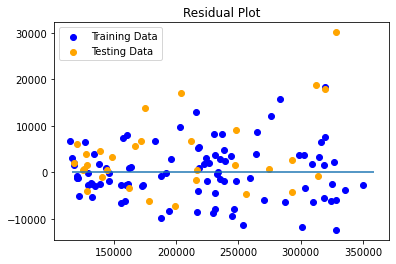

In [5]:
predicted_housing_combined_data_df = MultivariateLinearRegression(housing_combined_data_df, housing_combined_data_df["avg_home_price"])

In [6]:
predicted_housing_combined_data_df.head(5)

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed,y_actual_output,predicted,error
1,1990-04-01,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333,126800.0,120716.385499,-6083.614501
2,1990-07-01,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667,117000.0,122134.760840,5134.760840
3,1990-10-01,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333,121500.0,114793.299695,-6706.700305
4,1991-01-01,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333,120000.0,118477.503169,-1522.496831
5,1991-04-01,9.52,1011.000000,119900.0,64.1,56.66,7.100000,957.000000,114.47,662.000000,1085.333333,119900.0,117978.859194,-1921.140806


(100000.0, 400000.0)

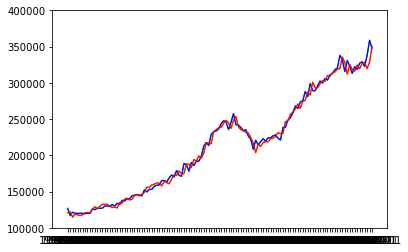

In [7]:
#Line Plot

#numpy functions
x_axis = predicted_housing_combined_data_df["date"].to_list()
y_axis = predicted_housing_combined_data_df["predicted"].to_list()
y_axis1 = predicted_housing_combined_data_df["y_actual_output"].to_list()

#Graphing functions (single or multiple lines)
plt.plot(x_axis, y_axis1)
plt.plot(x_axis, y_axis) #second line

#Asthetics
#Line plots (tuples)
line_one,=plt.plot(x_axis,y_axis1,color='blue',linewidth=1,label="Line One")
line_two,=plt.plot(x_axis,y_axis,color='red',linewidth=1,label="Line Two")

# Set your x and y limits
# plt.xlim(0, 10)
plt.ylim(100000, 400000)